In [128]:
lc = freud.locality.LinkCell(box, 1.5)
lc.compute(box, positions, positions)
print(lc.nlist.index_i[:100])
print(lc.nlist.index_j[lc.nlist.index_i == 0])

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 3
 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 6 6
 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8]
[ 1  2  3 66 67 17 19 83 13 14 78 29]


In [129]:
lc.nlist??

In [117]:
import freud
import numpy as np
import util
import rowan

(box, positions) = util.make_fcc(4, 4, 4)
quats = np.zeros((len(positions), 4), dtype=np.float32)
quats[:, 0] = 1

r_cut = 1.5
num_neighbors = 12
npt = npp = 6
bo = freud.environment.BondOrder(r_cut, 0, num_neighbors, npt, npp)

# Test that there are exactly 12 non-zero bins for a perfect FCC structure.
bo.compute(box, positions, quats, positions, quats)
op_value = bo.bond_order
print(op_value)

# Test that reset works.
bo.reset()

# Test that lbod gives identical results when orientations are the same.
bo.accumulate(box, positions, quats, positions, quats, mode='lbod')

# Test that mode bod gives the same number of bins but different results when the system is rotated by pi/3 about z, while lbod gives identical results.
quat = rowan.from_axis_angle([1, 0, 0], np.pi/3)
rotated_positions = box.wrap(rowan.rotate(quat, positions))
rotated_quats = rowan.multiply(quat, quats)
bo.compute(box, rotated_positions, rotated_quats, rotated_positions, rotated_quats, mode='lbod')
print(bo.bond_order)

[[  0.        0.        0.        0.        0.        0.     ]
 [667.88257 667.88257 667.88257   0.      667.88257   0.     ]
 [  0.        0.        0.        0.        0.        0.     ]
 [488.92398   0.      488.92398 488.92398   0.      488.92398]
 [667.8827  667.8827  667.8827    0.      667.8827    0.     ]
 [  0.        0.        0.        0.        0.        0.     ]]
[[  0.       256.59686    0.         0.       285.10764    0.      ]
 [125.227974 480.0406   125.227974 521.78326  448.73358  109.57448 ]
 [376.24228   64.93521  380.06198  114.59155   68.75494  114.59155 ]
 [127.96057   76.39437  141.32959  374.33243   80.21409  374.33243 ]
 [527.0012   459.16934  537.4368   135.66367  480.04068  135.66367 ]
 [  0.       306.49072    0.         0.       256.59686    0.      ]]


In [114]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

<IPython.core.display.Javascript object>


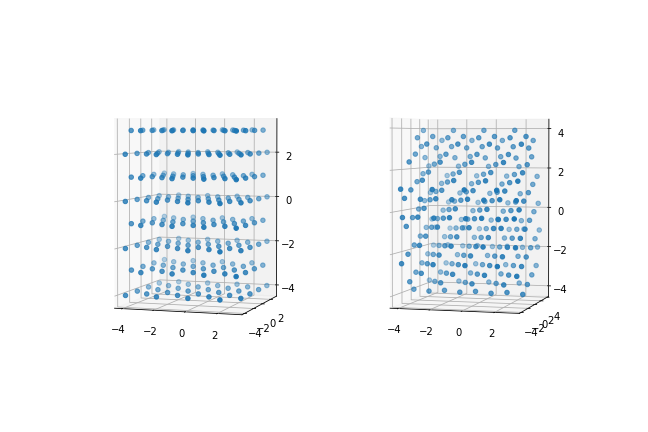

In [115]:
fig, axes = plt.subplots(1, 2, figsize=(9, 6), subplot_kw=dict(projection='3d'))
axes[0].scatter(positions[:, 0], positions[:, 1], positions[:, 2])
axes[1].scatter(rotated_positions[:, 0], rotated_positions[:, 1], rotated_positions[:, 2])

In [40]:
print(box)
print(b2)

Box(Lx=8.0, Ly=8.0, Lz=8.0, xy=0.0, xz=0.0, yz=0.0, dimensions=3)
Box(Lx=8.0, Ly=4.0, Lz=4.0, xy=-1.7320507764816284, xz=0.0, yz=1.7320507764816284, dimensions=3)


In [41]:
tmp

array([[ 8.        , -6.92820323,  0.        ],
       [ 0.        ,  4.        ,  6.92820323],
       [ 0.        ,  0.        ,  4.        ]])

In [87]:
rowan.rotate(rowan.from_axis_angle([1, 0, 0], 4*np.pi/3), np.array(box.to_matrix()))

array([[ 8.        ,  0.        ,  0.        ],
       [ 0.        , -4.        , -6.92820323],
       [ 0.        ,  6.92820323, -4.        ]])

In [101]:
print(tmp)

[[ 8.          0.          0.        ]
 [ 0.          4.          6.92820323]
 [ 0.         -6.92820323  4.        ]]


In [96]:
tmp = rowan.rotate(rowan.from_axis_angle([1, 0, 0], np.pi/3), np.array(box.to_matrix()).T)
Q, R = np.linalg.qr(tmp)
print(Q)
print(R)
print(rowan.from_matrix(Q, require_orthogonal=False))
signs = np.diag(np.diag(np.where(tmp < 0, -np.ones(tmp.shape), np.ones(tmp.shape))))
print(tmp.dot(signs))
print(tmp)
#tmp[:, 1] = tmp[:, 1][::-1]
#b2 = freud.box.Box.from_matrix(tmp)

[[ 1.         0.         0.       ]
 [ 0.        -0.5        0.8660254]
 [ 0.         0.8660254  0.5      ]]
[[ 8.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00 -8.0000000e+00 -8.8817842e-16]
 [ 0.0000000e+00  0.0000000e+00  8.0000000e+00]]
[-0.         0.         0.5        0.8660254]
[[ 8.          0.          0.        ]
 [ 0.          4.          6.92820323]
 [ 0.         -6.92820323  4.        ]]
[[ 8.          0.          0.        ]
 [ 0.          4.          6.92820323]
 [ 0.         -6.92820323  4.        ]]


In [38]:
bo = freud.environment.BondOrder(1, 0, num_neighbors, npt, npp)
bo.compute(b2, rotated_positions, quats, rotated_positions, quats).bond_order

array([[541.7045  , 370.63992 , 940.8552  ,   0.      ,   0.      ,
          0.      ],
       [268.71835 , 260.89163 ,  49.56941 ,   0.      , 302.63428 ,
        302.63428 ],
       [ 38.197186,  38.197186,  30.557749, 366.693   , 420.16904 ,
        433.53806 ],
       [366.693   , 420.16904 , 420.16904 ,  38.197186,  38.197186,
         30.557749],
       [  0.      , 302.63434 , 302.63434 , 279.15408 , 250.45601 ,
         52.178337],
       [  0.      ,   0.      ,   0.      , 570.2153  , 370.63992 ,
        940.8552  ]], dtype=float32)

In [107]:
bo.compute(b2, rotated_positions, quats, rotated_positions, quats).bond_order

RuntimeError: Cannot generate a cell list where cell_width is larger than half the box.

In [28]:
print(b2)

Box(Lx=8.0, Ly=8.0, Lz=8.0, xy=0.0, xz=0.0, yz=0.0, dimensions=3)
